In [39]:
import data_loader
import pandas as pd
from matplotlib_venn import venn2
import matplotlib
# matplotlib font parameters
font = {'family' : 'sans-serif',
        'sans-serif':['Arial'],
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [ ]:

peptides = data_loader.Peptide()

In [4]:
peptides.pacbio_filtered_peptide

ms_accessions = set()
for accs in peptides.pacbio_filtered_peptide['accs']:
    ms_accessions = ms_accessions.union(accs)

In [16]:
pclass = pd.read_table('/Users/bj8th/Documents/Sheynkman-Lab/Data/JURKAT_06-06-2021/protein_filter/jurkat.classification_filtered.tsv', usecols=['pb','pr_gene', 'CPM', 'pclass', 'psubclass'])
tclass = pd.read_table('/Users/bj8th/Documents/Sheynkman-Lab/Data/JURKAT_06-06-2021/sqanti3-filtered/jurkat_classification.5degfilter.tsv', usecols=['isoform', 'structural_category'])
classification = pclass.merge(tclass, how='left', left_on='pb', right_on='isoform')
classification['found_in_ms'] = classification['pb'].isin(ms_accessions)



classification.groupby(['structural_category', 'found_in_ms']).size()


structural_category      found_in_ms
full-splice_match        False           6504
                         True            6980
incomplete-splice_match  False           4765
                         True             786
novel_in_catalog         False          10640
                         True            3527
novel_not_in_catalog     False           8261
                         True            3605
dtype: int64

In [19]:
classification.groupby(['pclass', 'found_in_ms']).size()


pclass  found_in_ms
pFSM    False           7953
        True            8378
pNIC    False           5376
        True            2266
pNNC    False          16841
        True            4254
dtype: int64

PacBio unique	1560
GENCODE unique	7054
Intersection	69201
0.9074945905186546


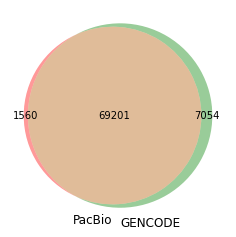

In [33]:
filtered_peptide_set= set(peptides.pacbio_filtered_peptide['Full Sequence'])
gencode_peptide_set = set(peptides.gencode_peptide['Full Sequence'])
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

print(f'PacBio unique\t{len(filtered_peptide_set - gencode_peptide_set)}')
print(f'GENCODE unique\t{len(gencode_peptide_set - filtered_peptide_set)}')
print(f'Intersection\t{len(filtered_peptide_set.intersection(gencode_peptide_set))}')
print(len(filtered_peptide_set.intersection(gencode_peptide_set)) / len(gencode_peptide_set))
venn2([filtered_peptide_set, gencode_peptide_set], set_labels=['PacBio', 'GENCODE'], ax=ax)


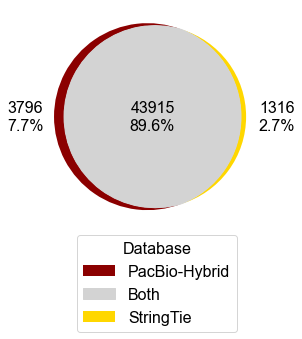

In [40]:
from mass_spec_venn import make_venn_diagram
import matplotlib.pyplot as plt
short_long_comparision = {
    'PacBio-Hybrid (Sampling Space)': 3796, 
    'Overlap':43915, 
    'StringTie (Sampling Space)': 1316
}

fig, ax = plt.subplots(figsize=(5,5),tight_layout=True)
vd = venn2(
    subsets = (short_long_comparision['PacBio-Hybrid (Sampling Space)'], short_long_comparision['StringTie (Sampling Space)'], short_long_comparision['Overlap']), 
    set_colors=['darkred' , 'gold'], 
    set_labels=None,
    alpha=1, 
    ax=ax
)

h,l = [],[]

vd.get_patch_by_id('11').set_color('lightgray')
left_label = 'PacBio-Hybrid'
right_label='StringTie'
total = sum(short_long_comparision.values())
for i in ['10','11','01']:
    num = int(vd.get_label_by_id(i).get_text())
    lbl = vd.get_label_by_id(i)
    lbl.set_text(f'{num}\n{num/total:.1%}')
    x, y = lbl.get_position()
    if i == '10':
        lbl.set_position((x-0.2, y))
    if i == '01':
        lbl.set_position((x+0.2, y))
    h.append(vd.get_patch_by_id(i))
vd.get_patch_by_id('11').set_color('lightgray')
l = [left_label, "Both", right_label]
legend_xpos = 0.92
ax.legend(handles=h,labels=l,title='Database',loc='best', bbox_to_anchor=(legend_xpos, -0.))
plt.savefig('PacBio_StringTie_venn.svg', bbox_inches='tight')


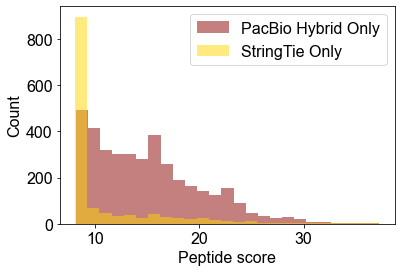

In [57]:
score_distinct_ifile = 'Score_PEP_for distinctPeptides.txt'
scores = pd.read_table(score_distinct_ifile)


fig, ax = plt.subplots()
import seaborn as sns 

# sns.kdeplot(x=scores['Hybrid Only Peptide Score'])
bins=25
scores['Hybrid Only Peptide Score'].hist(bins=bins, alpha=0.5, color='darkred', ax=ax, label='PacBio Hybrid Only')
scores['StringTie Only Peptide Score'].hist(bins=bins, alpha=0.5, color='gold', ax=ax, label='StringTie Only')
ax.legend()
ax.grid(False)
ax.set_xlabel('Peptide score')
ax.set_ylabel('Count')
plt.savefig('Hybrid_StringTie_peptide_score.svg', bbox_inches='tight')

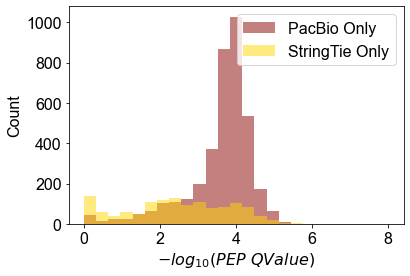

In [58]:
import numpy as np
bins=25
fig, ax = plt.subplots()
scores['-log10(Hybrid PEP)'] = -np.log10(scores['Hybrid Only Peptide PEP'] + 1e-8)
scores['-log10(StringTie PEP)'] = -np.log10(scores['StringTie Only Peptide PEP'] + 1e-8)

scores['-log10(Hybrid PEP)'].hist(bins=bins, alpha=0.5, color='darkred', ax=ax, label='PacBio Only')
scores['-log10(StringTie PEP)'].hist(bins=bins, alpha=0.5, color='gold', ax=ax, label='StringTie Only')
ax.legend()
ax.grid(False)
ax.set_xlabel('$-log_{10}(PEP\ QValue)$')
ax.set_ylabel('Count')
plt.savefig('Hybrid_StringTie_peptide_PEP.svg', bbox_inches='tight')

In [50]:
scores

,Hybrid Only Peptide Score,StringTie Only Peptide Score,Unnamed: 2,Hybrid Only Peptide PEP,StringTie Only Peptide PEP,-log10(Hybrid PEP),-log10(StringTie PEP)
0,37.269,37.226,NaN,0.000078,0.000138,4.107905,3.860168
1,36.233,35.292,NaN,0.000024,0.000005,4.621602,5.261219
2,36.217,34.323,NaN,0.000016,0.000033,4.795880,4.482804
3,35.350,33.362,NaN,0.000195,0.000053,3.710304,4.271646
4,35.242,33.282,NaN,0.000006,0.000009,5.233587,5.060481
...,...,...,...,...,...,...,...
3791,8.137,NaN,NaN,0.006631,NaN,2.178432,NaN
3792,8.137,NaN,NaN,0.000763,NaN,3.117476,NaN
3793,8.136,NaN,NaN,0.241353,NaN,0.617347,NaN
3794,8.135,NaN,NaN,0.009306,NaN,2.031259,NaN
